In [1]:
# loading guns (-_-)... i'm kidding loading requred packages 
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")
dfrev = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum().any()

False

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.shape

(1338, 7)

In [7]:
 x = list(range(0, 1338))

In [8]:
cata= ['smoke','region','sex']

In [9]:
categorical_Attributes = data.select_dtypes(include=['object']).columns

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['smoker'])
data['smoker']=le.transform(data['smoker'])
le.fit(data['region'])
data['region']=le.transform(data['region'])
le.fit(data['sex'])
data['sex']=le.transform(data['sex'])

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


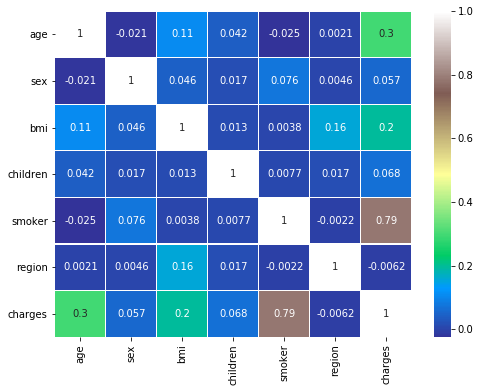

In [12]:
sns.heatmap(data.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

look like age and smoking is highly correated to charges 

C:\Annaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


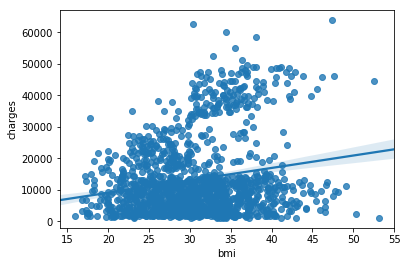

In [13]:
sns.regplot(x="bmi", y="charges", data=data)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data_X = data.drop(['charges'],axis=1)
data_Y = data['charges']  

trainX, testX, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=122)

In [16]:
print(trainX.shape)
print(testX.shape)
print(train_Y.shape)
print(test_Y.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX) 
testX = scaler.transform(testX)

C:\Annaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Annaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Annaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=123)
reg.fit(X_train, y_train)
predict1 = reg.predict(testX)
r2_score(test_Y,predict1) 

0.8033772284172229

Coefficients: 
 [3341.7323215   269.55823782 1890.81800732  684.45621887 9286.24330177
 -418.21160592]
Variance score: 0.7634758977076318


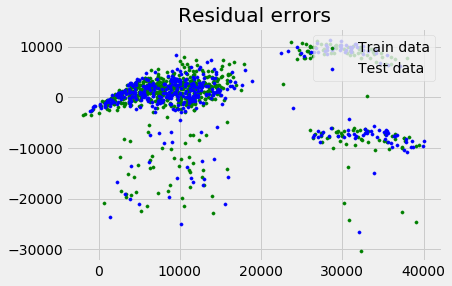

In [19]:

# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
			color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
			color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 


In [20]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=125)
reg.fit(X_train, y_train)
predict2 = reg.predict(testX)
r2_score(test_Y,predict2) 

0.80092457019967

In [21]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=205)
reg.fit(X_train, y_train)
predict3 = reg.predict(testX)
r2_score(test_Y,predict3) 

0.7912535105481838

In [22]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=4050)
reg.fit(X_train, y_train)
predict4 = reg.predict(testX)
r2_score(test_Y,predict4) 

0.8050739528904581

In [23]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=900)
reg.fit(X_train, y_train)
predict5 = reg.predict(testX)
r2_score(test_Y,predict5) 

0.7980626064408547

In [24]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=800)
reg.fit(X_train, y_train)
predict6 = reg.predict(testX)
r2_score(test_Y,predict6) 

0.8036124490721532

In [25]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=220)
reg.fit(X_train, y_train)
predict7 = reg.predict(testX)
r2_score(test_Y,predict7) 

0.8036085570964209

In [26]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=200)
reg.fit(X_train, y_train)
predict8 = reg.predict(testX)
r2_score(test_Y,predict8) 

0.8045161515935254

In [27]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=115)
reg.fit(X_train, y_train)
predict9 = reg.predict(testX)
r2_score(test_Y,predict9)

0.796003185714206

In [28]:
X_train, X_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, 
                                                    random_state=100)
reg.fit(X_train, y_train)
predict10 = reg.predict(testX)
r2_score(test_Y,predict10) 

0.8000541304483172

In [29]:
d = {'predict1':predict1,'predict2':predict2,'predict3':predict3,'predict4':predict4,'predict5':predict5,'predict6':predict6,'predict7':predict7,'predict8':predict8,'predict9':predict9,'predict10':predict10}
predict = pd.DataFrame(d)

In [30]:
testY = test_Y.to_frame()
testY = testY.reset_index()
testY = testY.drop('index',axis = 1)
testY.head()

,charges
0,8551.34700
1,8116.68000
2,5729.00530
3,6796.86325
4,19442.35350


In [31]:
avg_pred = predict.mean(axis = 1)
variance = predict.var(axis = 1)
predict['Avg_pred'] = avg_pred
predict['Variance'] = variance * .9
predict['actual'] = testY['charges']

In [32]:
predict['Error'] = (predict['predict1'] - predict['actual']) ** 2 + \
                     (predict['predict2'] - predict['actual']) ** 2 + \
                     (predict['predict3'] - predict['actual']) ** 2 + \
                     (predict['predict4'] - predict['actual']) ** 2 + \
                     (predict['predict5'] - predict['actual']) ** 2 + \
                     (predict['predict6'] - predict['actual']) ** 2 + \
                     (predict['predict7'] - predict['actual']) ** 2 + \
                     (predict['predict8'] - predict['actual']) ** 2 + \
                    (predict['predict9'] - predict['actual']) ** 2 + \
                    (predict['predict10'] - predict['actual']) ** 2 
predict['Error'] = predict['Error'] / 10 

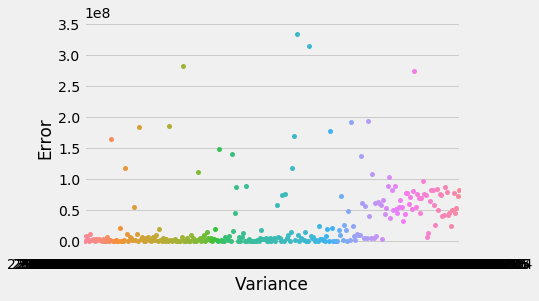

In [33]:
sns.swarmplot(x='Variance',y='Error',data=predict)

In [34]:
linear_reg_predict = predict
linear_reg_predict.head()

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,Avg_pred,Variance,actual,Error
0,9740.674355,10451.698161,10412.049221,10038.728842,10381.042551,10195.426612,9870.243377,10546.664146,10455.677681,10537.677693,10262.988264,74674.013882,8551.34700,3.004390e+06
1,9684.549034,9403.965834,9262.600871,9290.588879,9159.914657,9456.201240,9340.451527,9704.540424,9709.782112,9729.151978,9474.174656,41821.082349,8116.68000,1.884613e+06
2,9554.370560,9171.780032,9397.022265,9236.389452,9648.565290,8826.965883,9807.702644,9261.757973,9126.662789,8681.873381,9271.309027,110298.241463,5729.00530,1.265821e+07
3,9413.227319,8762.067589,9246.798903,8973.321569,9282.173523,8668.971322,9528.037170,8870.923965,9088.613862,8361.703361,9019.583858,118511.558601,6796.86325,5.058998e+06
4,7677.880984,7159.621673,7372.596248,7308.388757,7531.992475,6773.051912,7701.089536,7165.665727,7215.872592,6717.131053,7262.329096,101087.666871,19442.35350,1.484541e+08


In [35]:
ML_Regr_bias_var_err = pd.DataFrame()
Knn_Regr_bias_var_err = pd.DataFrame()
DT_Regr_bias_var_err = pd.DataFrame()
RF_Regr_bias_var_err = pd.DataFrame()
SVM_Regr_bias_var_err = pd.DataFrame()

In [53]:
from sklearn import linear_model
from sklearn.metrics import r2_score

def test_pred_ML_Regr(X_train, y_train):
    regr = linear_model.LinearRegression()
    regr_model = regr.fit(X_train, y_train)
    pred = regr_model.predict(testX)
    print("r2_score:",r2_score(test_Y,pred))
    return pred

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [37]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    x_train, x_test, y_train, y_test = train_test_split(trainX, train_Y, test_size=0.4, random_state = 123)
    knn_model = model.fit(x_train, y_train)  #fit the model
    pred=knn_model.predict(testX) #make prediction on test set
    error = sqrt(mean_squared_error(test_Y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6504.6678222325045
RMSE value for k=  2 is: 6001.267603526325
RMSE value for k=  3 is: 5606.578609658901
RMSE value for k=  4 is: 5271.022788860573
RMSE value for k=  5 is: 5137.406424148874
RMSE value for k=  6 is: 5115.061095539178
RMSE value for k=  7 is: 5237.4835434012975
RMSE value for k=  8 is: 5256.206311186973
RMSE value for k=  9 is: 5312.846777685887
RMSE value for k=  10 is: 5380.946547322591
RMSE value for k=  11 is: 5324.078718700831
RMSE value for k=  12 is: 5330.081924227667
RMSE value for k=  13 is: 5407.934138813951
RMSE value for k=  14 is: 5502.442755654215
RMSE value for k=  15 is: 5492.731066129431
RMSE value for k=  16 is: 5499.353411286656
RMSE value for k=  17 is: 5425.270360342664
RMSE value for k=  18 is: 5421.038710082257
RMSE value for k=  19 is: 5451.842650261412
RMSE value for k=  20 is: 5479.1676951127765


In [38]:
def test_pred_Knn_Regr(X_train, y_train):
    knn = neighbors.KNeighborsRegressor(n_neighbors = 6)
    knn_model = knn.fit(X_train, y_train)
    pred = knn_model.predict(testX)
    print("r2_score:",r2_score(test_Y,pred))
    return pred

In [39]:
from sklearn.tree import DecisionTreeRegressor
Dt_regr = DecisionTreeRegressor(max_depth=5)

def test_pred_DT_Regr(X_train, y_train):
    Dt_regr_model = Dt_regr.fit(X_train, y_train)
    pred = Dt_regr_model.predict(testX)
    print("r2_score:",r2_score(test_Y,pred))
    return pred

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

def test_pred_RF_Regr(X_train, y_train):
    RF_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
    RF_regr_model = RF_regr.fit(X_train, y_train)
    pred = RF_regr_model.predict(testX)
    print("r2_score:",r2_score(test_Y,pred))
    return pred

In [41]:
from sklearn.svm import SVR

def test_pred_SVM_Regr(X_train, y_train):
    SVM_regr = SVR()
    SVM_regr_model = SVM_regr.fit(X_train, y_train)
    pred = SVM_regr_model.predict(testX)
    print("r2_score:",r2_score(test_Y,pred))
    return pred

In [42]:
def sample_predict_target():
    randm_state = 300
    for index in range(1,11):
        #print("index:",index)
        col = "predict" + str(index)
        print("column:",col)
        X_train, t_x, y_train, t_Y = train_test_split(trainX, train_Y, test_size=0.4, random_state= randm_state+index)
        Knn_Regr_bias_var_err[col] =test_pred_Knn_Regr(X_train, y_train)
        DT_Regr_bias_var_err[col] =test_pred_DT_Regr(X_train, y_train)
        RF_Regr_bias_var_err[col] =test_pred_RF_Regr(X_train, y_train)
        SVM_Regr_bias_var_err[col] =test_pred_SVM_Regr(X_train, y_train)
        
    return

In [43]:
def calc_bias_var_err(predict):
    #print("inside: calc_bias_var_err")
    avg_pred = predict.mean(axis = 1)
    variance = predict.var(axis = 1)
    predict['avg_pred'] = avg_pred
    predict['variance'] = variance * .9
    predict['actual'] = testY['charges']
    #print("inside1: calc_bias_var_err")
    predict['bias'] = (predict['avg_pred'] - predict['actual']) ** 2
    print("inside2: calc_bias_var_err")
    predict['error'] = (predict['predict1'] - predict['actual']) ** 2 + \
                     (predict['predict2'] - predict['actual']) ** 2 + \
                     (predict['predict3'] - predict['actual']) ** 2 + \
                     (predict['predict4'] - predict['actual']) ** 2 + \
                     (predict['predict5'] - predict['actual']) ** 2 + \
                     (predict['predict6'] - predict['actual']) ** 2 + \
                     (predict['predict7'] - predict['actual']) ** 2 + \
                     (predict['predict8'] - predict['actual']) ** 2 + \
                    (predict['predict9'] - predict['actual']) ** 2 + \
                    (predict['predict10'] - predict['actual']) ** 2 
    print("inside3: calc_bias_var_err")
    predict['error'] = predict['error'] / 10 
    print("returning from: calc_bias_var_err")
    return predict

In [44]:
test_pred_Knn_Regr_arry=test_pred_Knn_Regr(X_train, y_train)
test_pred_Knn_Regr_arry= pd.DataFrame(test_pred_Knn_Regr_arry)
test_pred_Knn_Regr_arry.head()

r2_score: -0.10326684291587163


,0
0,8419.204283
1,8613.220233
2,16273.261808
3,5906.020900
4,17182.891783


In [45]:
sample_predict_target()

column: predict1
r2_score: 0.8316624982397944
r2_score: 0.8770644347345666
r2_score: 0.8644585825682671
r2_score: -0.16522273625085804
column: predict2
r2_score: 0.825303164705908
r2_score: 0.8743147548239943


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.867641786860968
r2_score: -0.18629657149909917
column: predict3
r2_score: 0.8124602865363506


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8889616770035799
r2_score: 0.8701166952816757
r2_score: -0.21287315856026856
column: predict4
r2_score: 0.8370420886065291
r2_score: 0.875843815104735


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8660173209269374
r2_score: -0.18966933962788857
column: predict5
r2_score: 0.8251648949054351
r2_score: 0.8776185112948036


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8637017784126836
r2_score: -0.2171169896018601
column: predict6
r2_score: 0.8340339882552961


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8589854344331569
r2_score: 0.8660614234202388
r2_score: -0.17153314953264265
column: predict7
r2_score: 0.8239449001289517
r2_score: 0.8773747442044951


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8663790687924381
r2_score: -0.17426944438603797
column: predict8
r2_score: 0.8323012946268022
r2_score: 0.8685974720490708


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.86687410294999
r2_score: -0.2002411036717835
column: predict9
r2_score: 0.8326530368882639
r2_score: 0.8660593622855748


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8649108743222614
r2_score: -0.17809496655955526
column: predict10
r2_score: 0.8271978173999637
r2_score: 0.8600929757983251


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2_score: 0.8646626649768587
r2_score: -0.18403570369496491


C:\Annaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
Knn_Regr_bias_var_err.head()

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10
0,10800.734217,11462.565050,7680.770167,11506.650217,7206.928833,11128.789550,7524.677667,8194.703000,7917.416333,11244.864550
1,11951.194210,11778.527377,10518.364108,11738.616710,12142.356877,11778.527377,11581.606543,13583.386485,11509.404377,10782.686210
2,6421.174508,6301.190933,5588.807150,5958.980667,6572.133942,6053.813783,6886.753358,6273.027867,6415.449175,5850.716133
3,8496.000000,7546.639350,7388.396267,7245.138642,7742.642558,7677.857783,6847.421458,7329.130200,7643.589542,7791.756767
4,7432.580258,7455.854308,4658.135058,4581.092750,6868.507467,5605.272867,5642.870383,7525.153642,7058.650442,6863.618450


In [58]:
linear_reg_predict_var_err = calc_bias_var_err(linear_reg_predict)
Knn_Regr_bias_var_err= calc_bias_var_err(Knn_Regr_bias_var_err)
DT_Regr_bias_var_err= calc_bias_var_err(DT_Regr_bias_var_err)
RF_Regr_bias_var_err= calc_bias_var_err(RF_Regr_bias_var_err)
SVM_Regr_bias_var_err= calc_bias_var_err(SVM_Regr_bias_var_err)

inside2: calc_bias_var_err
inside3: calc_bias_var_err
returning from: calc_bias_var_err
inside2: calc_bias_var_err
inside3: calc_bias_var_err
returning from: calc_bias_var_err
inside2: calc_bias_var_err
inside3: calc_bias_var_err
returning from: calc_bias_var_err
inside2: calc_bias_var_err
inside3: calc_bias_var_err
returning from: calc_bias_var_err
inside2: calc_bias_var_err
inside3: calc_bias_var_err
returning from: calc_bias_var_err


In [48]:
Knn_Regr_bias_var_err.head()

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,avg_pred,variance,actual,bias,error
0,10800.734217,11462.565050,7680.770167,11506.650217,7206.928833,11128.789550,7524.677667,8194.703000,7917.416333,11244.864550,9466.809958,3.193475e+06,8551.34700,8.380724e+05,4.031547e+06
1,11951.194210,11778.527377,10518.364108,11738.616710,12142.356877,11778.527377,11581.606543,13583.386485,11509.404377,10782.686210,11736.467027,6.094520e+05,8116.68000,1.310286e+07,1.371231e+07
2,6421.174508,6301.190933,5588.807150,5958.980667,6572.133942,6053.813783,6886.753358,6273.027867,6415.449175,5850.716133,6232.204752,1.285668e+05,5729.00530,2.532097e+05,3.817765e+05
3,8496.000000,7546.639350,7388.396267,7245.138642,7742.642558,7677.857783,6847.421458,7329.130200,7643.589542,7791.756767,7570.857257,1.672697e+05,6796.86325,5.990667e+05,7.663365e+05
4,7432.580258,7455.854308,4658.135058,4581.092750,6868.507467,5605.272867,5642.870383,7525.153642,7058.650442,6863.618450,6369.173563,1.185313e+06,19442.35350,1.709080e+08,1.720933e+08


In [49]:
DT_Regr_bias_var_err.head()

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,avg_pred,variance,actual,bias,error
0,8719.981349,8716.019775,9370.965021,7829.874401,7570.858846,21631.318105,9179.266955,9391.131661,9107.981104,11427.118099,10294.451532,1.525901e+07,8551.34700,3.038413e+06,1.829743e+07
1,12821.042756,9280.761443,9370.965021,10491.098581,10164.714043,10623.551712,9179.266955,8217.971844,9107.981104,11427.118099,10068.447156,1.616314e+06,8116.68000,3.809395e+06,5.425709e+06
2,7466.148046,8058.444604,6090.940002,5767.159137,7204.576359,8360.813569,6029.421300,6992.086441,6555.794931,6429.474624,6895.485901,6.933222e+05,5729.00530,1.360677e+06,2.053999e+06
3,7466.148046,8058.444604,6090.940002,7829.874401,7204.576359,8360.813569,7573.932793,6992.086441,6555.794931,6429.474624,7256.208577,4.942196e+05,6796.86325,2.109981e+05,7.052177e+05
4,7466.148046,8058.444604,6090.940002,9245.931103,7204.576359,8360.813569,4700.623191,5902.737676,6555.794931,6429.474624,7001.548410,1.611577e+06,19442.35350,1.547736e+08,1.563852e+08


In [50]:
RF_Regr_bias_var_err.head()

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,avg_pred,variance,actual,bias,error
0,8352.338254,9265.932553,10760.844146,8825.065880,11022.495462,10520.302310,11584.562968,11370.989855,11499.257234,12632.152719,10583.394138,1.669218e+06,8551.34700,4.129216e+06,5.798433e+06
1,12927.968582,11684.200156,10909.522905,11921.993571,12035.092007,11982.169836,12080.252116,11518.694065,12160.300392,13317.799203,12053.799283,4.129073e+05,8116.68000,1.550091e+07,1.591382e+07
2,6129.198168,5998.401928,5359.867724,5644.783607,5374.049717,5708.473070,5431.144698,5505.242327,5244.186091,5218.207483,5561.355481,8.561900e+04,5729.00530,2.810646e+04,1.137255e+05
3,6129.198168,6137.795417,5492.548462,5644.783607,5374.049717,5708.473070,5687.043828,6456.328395,5310.397643,5218.207483,5715.882579,1.481868e+05,6796.86325,1.168519e+06,1.316706e+06
4,6129.198168,5998.401928,5359.867724,5572.801063,5374.049717,5708.473070,5431.144698,5175.568388,5244.186091,5218.207483,5521.189833,9.789110e+04,19442.35350,1.937988e+08,1.938967e+08


In [51]:
SVM_Regr_bias_var_err.head()

,predict1,predict2,predict3,predict4,predict5,predict6,predict7,predict8,predict9,predict10,avg_pred,variance,actual,bias,error
0,9289.472313,8973.031642,8602.396483,8927.095579,8540.368113,9188.782503,9145.631546,8783.380712,9092.853878,9001.288925,8954.430169,55081.530176,8551.34700,1.624760e+05,2.175576e+05
1,9291.492285,8978.217273,8609.048257,8923.946975,8547.216114,9193.247043,9148.559848,8785.293822,9098.075189,9011.674789,8958.677160,54727.527794,8116.68000,7.089592e+05,7.636867e+05
2,9265.822387,8952.793681,8576.829917,8898.618681,8519.879087,9168.730246,9120.492496,8749.499194,9070.441015,8978.876050,8930.198275,55518.150188,5729.00530,1.024764e+07,1.030315e+07
3,9277.342987,8964.379057,8588.713647,8910.445692,8532.423116,9181.361087,9132.385369,8760.056862,9080.620631,8991.114458,8941.884291,55478.728566,6796.86325,4.601115e+06,4.656594e+06
4,9254.907448,8941.602512,8563.141484,8886.316929,8507.695895,9157.456303,9110.091526,8736.323285,9058.160806,8966.319750,8918.201594,55856.589656,19442.35350,1.107578e+08,1.108136e+08


In [52]:
def calc_avg_bias_var_err(summary_Regr_bias_var_err,model_df, model):
    print("inside: calc_avg_bias_var_err: model\n",model)
    #model_df.head(10)
    error = model_df.bias + model_df.variance
    print("bias+variance: error:\n",error.head(10))
    print("calculated error:\n",model_df.error.head(10))
    
    #print(model_df.head(10))
    bias_avg = model_df.bias.mean()
    var_avg = model_df.variance.mean()
    err_avg = model_df.error.mean()
    
    summary_Regr_bias_var_err.append((model,bias_avg,var_avg,err_avg))
    print("returning from: calc_avg_bias_var_err")
    return summary_Regr_bias_var_err

In [59]:
summary_Regr_bias_var_err = []
summary_Regr_bias_var_err= calc_avg_bias_var_err(summary_Regr_bias_var_err,linear_reg_predict,"ML_Regr")
summary_Regr_bias_var_err= calc_avg_bias_var_err(summary_Regr_bias_var_err,Knn_Regr_bias_var_err,"Knn_Regr")
summary_Regr_bias_var_err= calc_avg_bias_var_err(summary_Regr_bias_var_err,DT_Regr_bias_var_err,"DT_Regr")
summary_Regr_bias_var_err= calc_avg_bias_var_err(summary_Regr_bias_var_err,RF_Regr_bias_var_err,"RF_Regr")
summary_Regr_bias_var_err= calc_avg_bias_var_err(summary_Regr_bias_var_err,SVM_Regr_bias_var_err,"SVM_Regr")   

df_avg_bias_var_err = pd.DataFrame.from_records(summary_Regr_bias_var_err, columns=['Model','bias','variance','error'])


inside: calc_avg_bias_var_err: model
 ML_Regr
bias+variance: error:
 0    6.231445e+11
1    2.444399e+11
2    1.110930e+13
3    1.772191e+12
4    1.528808e+15
5    6.474044e+14
6    5.782526e+11
7    4.070411e+09
8    7.460040e+11
9    2.426422e+11
dtype: float64
calculated error:
 0    3.004390e+06
1    1.884613e+06
2    1.265821e+07
3    5.058998e+06
4    1.484541e+08
5    9.661150e+07
6    2.887836e+06
7    2.478180e+05
8    3.287321e+06
9    1.874806e+06
Name: error, dtype: float64
returning from: calc_avg_bias_var_err
inside: calc_avg_bias_var_err: model
 Knn_Regr
bias+variance: error:
 0    1.426944e+23
1    2.624472e+25
2    9.050956e+18
3    1.771089e+20
4    7.090580e+29
5    3.801939e+23
6    2.252333e+22
7    1.442709e+22
8    2.272766e+21
9    1.238938e+22
dtype: float64
calculated error:
 0    4.031547e+06
1    1.371231e+07
2    3.817765e+05
3    7.663365e+05
4    1.720933e+08
5    5.424783e+06
6    2.500240e+06
7    2.331448e+06
8    1.500122e+06
9    2.328962e+06
Name: e

In [60]:
df_avg_bias_var_err

,Model,bias,variance,error
0,ML_Regr,1.931959e+13,2.427883e+14,3.180065e+07
1,Knn_Regr,1.724756e+28,1.731590e+29,2.740940e+07
2,DT_Regr,1.179999e+28,1.185438e+29,2.034026e+07
3,RF_Regr,1.682911e+28,1.694258e+29,2.136261e+07
4,SVM_Regr,2.165939e+31,2.180701e+32,1.895001e+08
